In [153]:
import numpy as np
import sys, os
sys.path.append(os.pardir)

def step_function(x):
    return np.array(x > 0, dtype=np.int)

def relu(x):
    return np.maximum(0, x)

def numerical_gradient(f, x):
    if x.ndim > 1:
        grads = np.empty(x.shape)
        for i in range(grads.shape[0]):
            grads[i] = numerical_gradient(f, x[i])
        return grads

    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))
#     c = np.max(x)
#     exp_x = np.exp(x - c)
#     sum_exp_x = np.sum(exp_x)
#     return exp_x / sum_exp_x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

iter : 0
train acc, test acc | 0.0993, 0.1032
iter : 100
iter : 200
iter : 300
iter : 400
iter : 500
iter : 600
train acc, test acc | 0.7899333333333334, 0.7915
iter : 700
iter : 800
iter : 900
iter : 1000
iter : 1100
iter : 1200
train acc, test acc | 0.87525, 0.8789
iter : 1300
iter : 1400
iter : 1500
iter : 1600
iter : 1700
iter : 1800
train acc, test acc | 0.89765, 0.9017
iter : 1900
iter : 2000
iter : 2100
iter : 2200
iter : 2300
iter : 2400
train acc, test acc | 0.90715, 0.9116
iter : 2500
iter : 2600
iter : 2700
iter : 2800
iter : 2900
iter : 3000
train acc, test acc | 0.9144833333333333, 0.9143
iter : 3100
iter : 3200
iter : 3300
iter : 3400
iter : 3500
iter : 3600
train acc, test acc | 0.9193833333333333, 0.92
iter : 3700
iter : 3800
iter : 3900
iter : 4000
iter : 4100
iter : 4200
train acc, test acc | 0.9238, 0.9244
iter : 4300
iter : 4400
iter : 4500
iter : 4600
iter : 4700
iter : 4800
train acc, test acc | 0.9269166666666667, 0.926
iter : 4900
iter : 5000
iter : 5100
iter : 

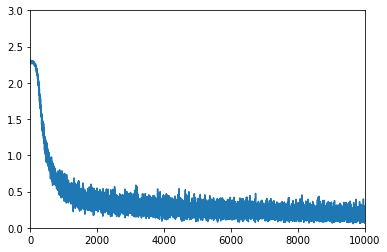

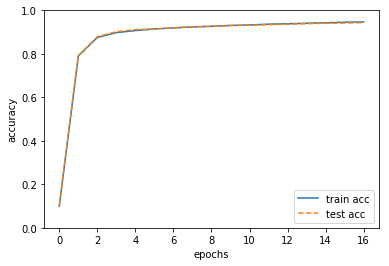

In [163]:
import matplotlib.pylab as plt
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    if i % 100 == 0: print("iter : " + str(i))
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
#    grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    iter_per_epoch = max(train_size / batch_size, 1)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

plt.plot(np.arange(len(train_loss_list)), train_loss_list)
plt.xlim(0, len(train_loss_list) - 1)
plt.ylim(0, 3)
plt.show()

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()